# Project 2
## Lars Bosch, Philipp Brückelt, Thomas Engl

Import the python scripts and execute the code in this Notebook.

In [2]:
## import the python scripts
from neural_network import *
from data_sets import *
from optimizers import *
from visualize import *

In [3]:
## import other modules
import autograd.numpy as np

# Exercise b)
The following code constructs a neural network which approximates the 1D Runge function. The first example uses 2 hidden layers with 50 and 100 nodes and only the sigmoid function as activation function. The cost function is given by the MSE.
In order to do this, we first define a function that computes all the results. Hence, we can call this function later for other examples, too, and avoid repeating code.

In [4]:
np.random.seed(0)                                   # choose a seed to be able to compare results


def compute_results(num_pts, function, activation_funcs, cost_func, layer_output_sizes):
    """ load data set """
    if function == 'runge':
        x_train, x_test, y_train, y_test = load_runge_data(num_pts)
    elif function == 'runge2D':
        x_train, x_test, y_train, y_test = load_runge2D_data(num_pts)
    elif function == 'rastrigin':
        x_train, x_test, y_train, y_test = load_rastrigin_data(num_pts)

    """ initialize the neural network """
    _, input_size = np.shape(x_train)
    activation_derivatives = get_activation_ders(activation_funcs)
    cost_der = mse_der
    # construct the network
    ffnn = NeuralNetwork(
            input_size, layer_output_sizes, activation_funcs, 
            activation_derivatives, cost_func, cost_der
            )
    """ make first predictions on the train data and compute the 
    cost function """
    first_predicts = ffnn.predict(x_test)
    mse_first_guess = cost_fnc(first_predicts, y_test)
    """ train the network and compute new predictions on the test data """
    ffnn.train_network(x_train, y_train, batches= 10, optimizer=Momentum(
         eta=0.01, momentum=0.9), epochs=500)
    predicts_new = ffnn.predict(x_test)
    mse_after_training = cost_fnc(predicts_new, y_test)
    return mse_first_guess, mse_after_training

In [6]:
n = 1000                                        # number of points

layer_output_sizes = [50, 100, 1]               # define number of nodes in layers (output size is 1)
activation_funcs = [sigmoid, sigmoid, identity] # activation functions
    
cost_fnc = mse 
mse_1, mse_2 = compute_results(n, 'runge', activation_funcs, 
                                               cost_fnc, layer_output_sizes)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  110.3064544027396
MSE after training:   0.03611369974327039


Next, we create a heat map which visualizes the dependence of the test accuracy on the number of hidden layers and number of nodes per layer. Again, we only use the sigmoid function. As optimization algorithm we use Gradient descent with momentum.

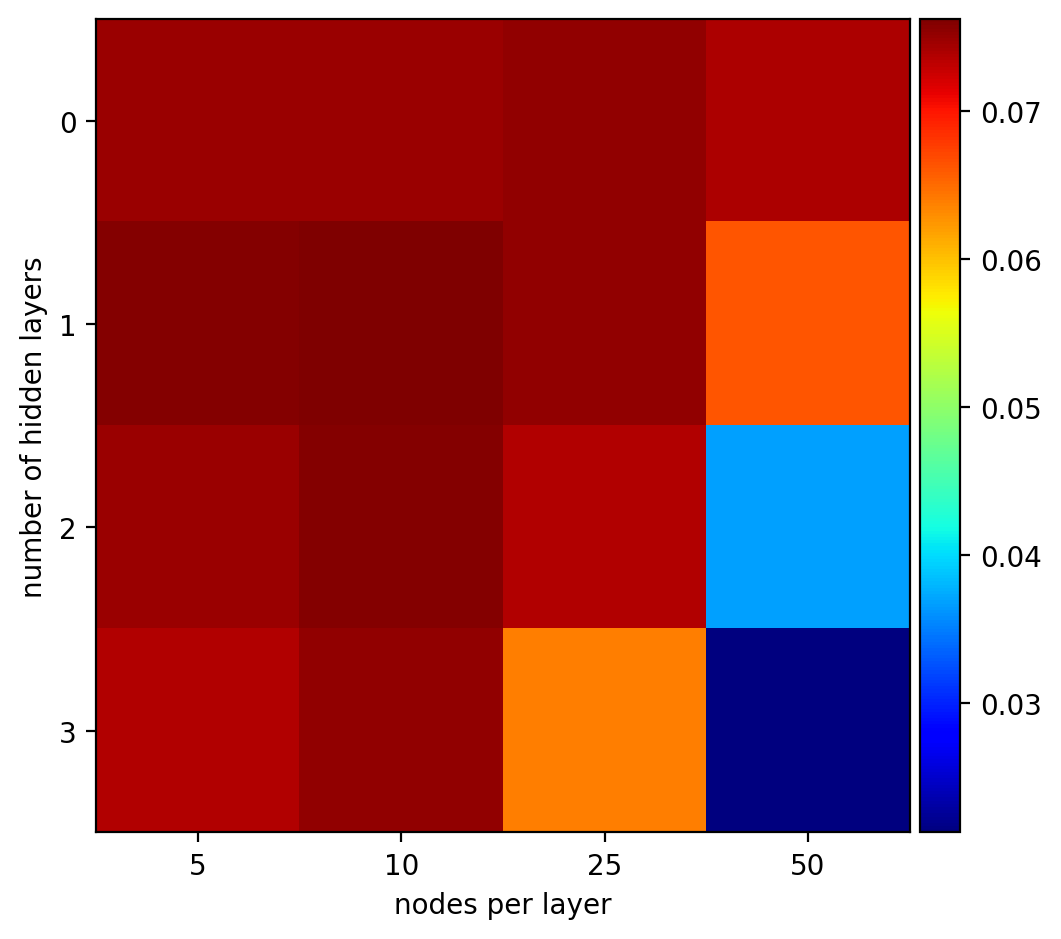

In [4]:
""" plot the dependence of the test accuracy on the number of hidden layers
    # and number of nodes per layer. Here, we only use the sigmoid function
    # as activation function """
heat_map_test_accuracy(load_runge_data(n), [0, 1, 2, 3], [5, 10, 25, 50], 
                       input_size, output_size, mse, Momentum(eta=0.01, momentum=0.9))

Now, we approximate the Runge function again, but use ReLU instead of Sigmoid in the first hidden layer.

In [7]:
activation_funcs = [ReLU, sigmoid, identity]     # activation functions

mse_1, mse_2 = compute_results(n, 'runge', activation_funcs, 
                                               cost_fnc, layer_output_sizes)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  1.1685478880114921
MSE after training:   0.016081154536769924


# Extension - 2D functions
We can also try more sophisticated functions, e.g., the 2D Runge function.

In [8]:
mse_1, mse_2 = compute_results(n, 'runge2D', activation_funcs, 
                                               cost_fnc, layer_output_sizes)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  30.84240233422382
MSE after training:   0.015438734674621906


Another interesting example is the Rastrigin function, defined as
$$
f(x) := 20 + x^2 - 10\cos(2 \pi x) + y^2 - 10\cos(2 \pi y).
$$

In [9]:
mse_1, mse_2 = compute_results(n, 'rastrigin', activation_funcs, 
                                               cost_fnc, layer_output_sizes)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  303.9096214255282
MSE after training:   0.43074588688084964
